预测煤矿的移动是否发生高能的地震冲击

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#导入数据
data = pd.read_csv('D:\zero.csv')
zero = pd.DataFrame(data)

In [3]:
#查看数据的属性
print("Keys of zero: \n{}".format(zero.keys()))
print("数据的数目: {}".format(len(zero)))

Keys of zero: 
Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps8', 'energy', 'maxenergy',
       'class'],
      dtype='object')
数据的数目: 2584


In [4]:
t0 = zero[zero['class'] == 0]
print("数据中未发生高能地震冲击次数: {}".format(len(t0)))

数据中未发生高能地震冲击次数: 2414


In [5]:
t1 = zero[zero['class'] == 1]
print("数据中发生高能地震冲击次数: {}".format(len(t1)))

数据中发生高能地震冲击次数: 170


In [6]:
#查看前10条数据
zero.head(10)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps8,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
5,a,a,W,63760,195,-73,-65,a,0,0,0,0,0,0,0,0,0,0,0
6,a,a,W,207930,614,-6,18,a,2,2,0,0,0,0,0,0,1000,700,0
7,a,a,N,48990,194,-27,-3,a,1,0,1,0,0,0,0,0,4000,4000,0
8,a,a,N,100190,303,54,52,a,0,0,0,0,0,0,0,0,0,0,0
9,a,a,W,247620,675,4,25,a,1,1,0,0,0,0,0,0,500,500,0


将数据与类别分开

In [7]:
data1 = zero[['seismic','seismoacoustic','shift','genergy','gpuls','gdenergy','gdpuls','ghazard','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7','nbumps8','energy','maxenergy']]
target = zero[['class']]

In [8]:
#查看数据类型
data1.dtypes

seismic           object
seismoacoustic    object
shift             object
genergy            int64
gpuls              int64
gdenergy           int64
gdpuls             int64
ghazard           object
nbumps             int64
nbumps2            int64
nbumps3            int64
nbumps4            int64
nbumps5            int64
nbumps6            int64
nbumps7            int64
nbumps8            int64
energy             int64
maxenergy          int64
dtype: object

In [9]:
#查看类别数据类型
target.dtypes

class    int64
dtype: object

转化数据类型为int型

In [10]:
#将seismic的类型转化为int型
seismic = data1['seismic'].unique()
dict = {}
for i in range(len(seismic)):
    dict[seismic[i]] = i
print(dict)
data1['seismic'] = data1['seismic'].map(dict)

{'a': 0, 'b': 1}


C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
#将seismoacoustic的类型转化为int型
seismoacoustic = data1['seismoacoustic'].unique()
dict = {}
for i in range(len(seismoacoustic)):
    dict[seismoacoustic[i]] = i
print(dict)
data1['seismoacoustic'] = data1['seismoacoustic'].map(dict)

{'a': 0, 'b': 1, 'c': 2}


C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
#将shift的类型转化为int型
shift = data1['shift'].unique()
dict = {}
for i in range(len(shift)):
    dict[shift[i]] = i
print(dict)
data1['shift'] = data1['shift'].map(dict)

{'N': 0, 'W': 1}


C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
#将ghazard的类型转化为int型
ghazard = data1['ghazard'].unique()
dict = {}
for i in range(len(ghazard)):
    dict[ghazard[i]] = i
print(dict)
data1['ghazard'] = data1['ghazard'].map(dict)

{'a': 0, 'b': 1, 'c': 2}


C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
#查看更改后的数据类型
data1.dtypes

seismic           int64
seismoacoustic    int64
shift             int64
genergy           int64
gpuls             int64
gdenergy          int64
gdpuls            int64
ghazard           int64
nbumps            int64
nbumps2           int64
nbumps3           int64
nbumps4           int64
nbumps5           int64
nbumps6           int64
nbumps7           int64
nbumps8           int64
energy            int64
maxenergy         int64
dtype: object

In [15]:
#再次查看前10条数据，观察数据是否都变为int型数据
data1.head(10)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps8,energy,maxenergy
0,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000
2,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000
4,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,63760,195,-73,-65,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,207930,614,-6,18,0,2,2,0,0,0,0,0,0,1000,700
7,0,0,0,48990,194,-27,-3,0,1,0,1,0,0,0,0,0,4000,4000
8,0,0,0,100190,303,54,52,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,247620,675,4,25,0,1,1,0,0,0,0,0,0,500,500


k近邻模型

In [16]:
#划分训练集与测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 data1, target, stratify=target, random_state=10)
#stratify：依据标签target，按原数据target中各类比例，分配给train和test，使得train和test中各类数据的比例与原数据集一样。

C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

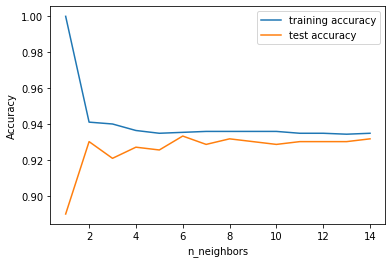

In [17]:
#查询k在1-14时为何值时，模型性能最好
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# n_neighbors取值从1到14
neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:
 # 构建模型
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # 记录训练集精度
 training_accuracy.append(clf.score(X_train, y_train))
 # 记录泛化精度
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

由图可知，当k为6时性能较好

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("训练精度: {:.3f}".format(knn.score(X_train, y_train)))
print("测试精度: {:.3f}".format(knn.score(X_test, y_test)))

训练精度: 0.936
测试精度: 0.933


C:\Users\ab635\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Logistic回归模型

In [19]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(C=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.933
Test set score: 0.930


C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


建立SVM模型

In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("训练集精度: {:.2f}".format(svc.score(X_train, y_train)))
print("测试集精度: {:.2f}".format(svc.score(X_test, y_test)))

C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


训练集精度: 1.00
测试集精度: 0.93


使用网格搜索寻找SVM的最佳参数gamma和C

In [21]:
# 将数据划分为训练+验证集与测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(
 data1, target, stratify=target, random_state=10)
# 将训练+验证集划分为训练集与验证集
X_train, X_valid, y_train, y_valid = train_test_split(
 X_trainval, y_trainval, random_state=1)
print("训练集数目: {} 验证集数目: {} 测试集数目:"
 " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
 # 对每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
 # 在验证集上评估SVC
        score = svm.score(X_valid, y_valid)
 # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("验证集最佳分数: {:.2f}".format(best_score))
print("最佳参数: ", best_parameters)
print("测试集最佳分数: {:.2f}".format(test_score))

训练集数目: 1453 验证集数目: 485 测试集数目: 646



C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

验证集最佳分数: 0.92
最佳参数:  {'C': 0.001, 'gamma': 0.001}
测试集最佳分数: 0.93


C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


决策树集成的梯度提升回归树模型

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("训练集精度: {:.3f}".format(gbrt.score(X_train, y_train)))
print("测试集精度: {:.3f}".format(gbrt.score(X_test, y_test)))

训练集精度: 0.971
测试集精度: 0.927


C:\Users\ab635\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
